<a href="https://colab.research.google.com/github/joel1794/ML_sem1_project/blob/master/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


%cd /content/drive/My\ Drive/ml_project_dataset/

In [0]:
%cd drive/My\ Drive/ml_project_dataset

/content/drive/My Drive/ml_project_dataset


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [0]:
import os
fpaths = []
labels = []
spoken = []
for f in os.listdir('audio'):
    for w in os.listdir('audio/' + f):
        fpaths.append('audio/' + f + '/' + w)
        labels.append(f)
        if f not in spoken:
            spoken.append(f)
print('Words spoken:', spoken)
print(labels)

Words spoken: ['lime', 'kiwi', 'orange', 'apple', 'banana', 'pineapple', 'peach']
['lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'peach', 'peach', 'peach', 'peach', 'peach', 'p

In [0]:
#Files can be heard in Linux using the following commands from the command line
#cat kiwi07.wav | aplay -f S16_LE -t wav -r 8000
#Files are signed 16 bit raw, sample rate 8000
from scipy.io import wavfile

data = np.zeros((len(fpaths), 32000))
# for image_info in data:
#     print(image_info)
maxsize = -1
for n,file in enumerate(fpaths):
    _, d = wavfile.read(file)
    # print(data.shape)
    # print(d.shape)
    data[n, :d.shape[0]] = d
    # print(data[n, :d.shape[0]].shape)
    if d.shape[0] > maxsize:
        maxsize = d.shape[0]
    # break
data = data[:, :maxsize]
print(data.shape)

# print("the data is " + str(data))

# for image_info in data:
#     print(len(image_info))

#Each sample file is one row in data, and has one entry in labels
print('Number of files total:', data.shape[0])

all_labels = np.zeros(data.shape[0])
print(set(labels))
print([(i, _) for i, _ in enumerate(set(labels))])
for n, l in enumerate(set(labels)):
    all_labels[np.array([i for i, _ in enumerate(labels) if _ == l])] = n
    
print('Labels and label indices', all_labels)
print('data dimensions are', d.shape)

(105, 6966)
Number of files total: 105
{'banana', 'kiwi', 'apple', 'lime', 'pineapple', 'orange', 'peach'}
[(0, 'banana'), (1, 'kiwi'), (2, 'apple'), (3, 'lime'), (4, 'pineapple'), (5, 'orange'), (6, 'peach')]
Labels and label indices [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6.]
data dimensions are (5944,)


In [0]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5889 sha256=446d36f16d55fccb610ad3fc26d695ec0551815192abf3fd915a27f9f4056edb
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


(47, 13)
mfcc shape (47, 13)
(45, 13)
mfcc shape (45, 13)
(47, 13)
mfcc shape (47, 13)


Text(0.5, 1.0, 'PSD of apple example')

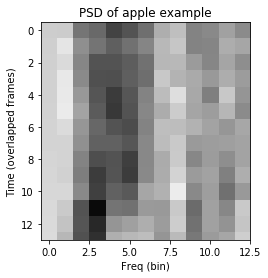

In [0]:
from python_speech_features import mfcc
# print(fpaths)

for n,file in enumerate(fpaths):
    (rate, sig) = wavfile.read(file)
    mfcc_feat = mfcc(sig,rate)
    print(mfcc_feat.shape)
    print("mfcc shape", mfcc_feat.shape)
    if n == 2:
      break

import matplotlib.pyplot as plt
plt.imshow(mfcc_feat, cmap='gray', interpolation=None)
plt.xlabel('Freq (bin)')
plt.ylabel('Time (overlapped frames)')
plt.ylim(mfcc_feat.shape[1])
plt.title('PSD of %s example'%labels[50])

In [0]:
import scipy

def stft(x, fftsize=64, overlap_pct=.5):   
    #Modified from http://stackoverflow.com/questions/2459295/stft-and-istft-in-python
    hop = int(fftsize * (1 - overlap_pct))
    w = scipy.hanning(fftsize + 1)[:-1]    
    raw = np.array([np.fft.rfft(w * x[i:i + fftsize]) for i in range(0, len(x) - fftsize, hop)])
    return raw[:, :(fftsize // 2)]

data dimension (105, 6966)
(216, 32)


Text(0.5, 1.0, 'PSD of apple example')

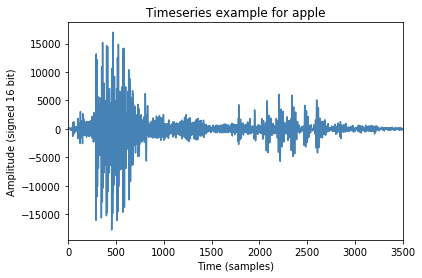

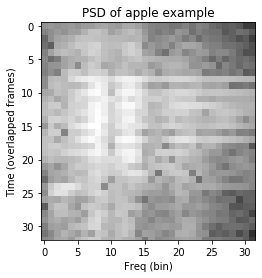

In [0]:
print('data dimension', data.shape)
import matplotlib.pyplot as plt
plt.plot(data[50, :], color='steelblue')
plt.title('Timeseries example for %s'%labels[50])
plt.xlim(0, 3500)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (signed 16 bit)')
plt.figure()

# + 1 to avoid log of 0
log_freq = 30 * np.log(np.abs(stft(data[50, :])) + 1)
print(log_freq.shape)
plt.imshow(log_freq, cmap='gray', interpolation=None)
plt.xlabel('Freq (bin)')
plt.ylabel('Time (overlapped frames)')
plt.ylim(log_freq.shape[1])
plt.title('PSD of %s example'%labels[50])

In [0]:
print('data dimensions', data.shape)

from numpy.lib.stride_tricks import as_strided

#Peak detection using the technique described here: http://kkjkok.blogspot.com/2013/12/dsp-snippets_9.html 
def peakfind(x, n_peaks, l_size=3, r_size=3, c_size=3, f=np.mean):
    win_size = l_size + r_size + c_size
    shape = x.shape[:-1] + (x.shape[-1] - win_size + 1, win_size)
    strides = x.strides + (x.strides[-1],)
    xs = as_strided(x, shape=shape, strides=strides)
    def is_peak(x):
        centered = (np.argmax(x) == l_size + int(c_size/2))
        l = x[:l_size]
        c = x[l_size:l_size + c_size]
        r = x[-r_size:]
        passes = np.max(c) > np.max([f(l), f(r)])
        if centered and passes:
            return np.max(c)
        else:
            return -1
    r = np.apply_along_axis(is_peak, 1, xs)
    top = np.argsort(r, None)[::-1]
    heights = r[top[:n_peaks]]
    #Add l_size and half - 1 of center size to get to actual peak location
    top[top > -1] = top[top > -1] + l_size + int(c_size / 2.)
    return heights, top[:n_peaks]

data dimensions (105, 6966)


data dimensions (105, 6966)
(216, 32)
plot_data dimensions (32,)


Text(0, 0.5, 'Amplitude')

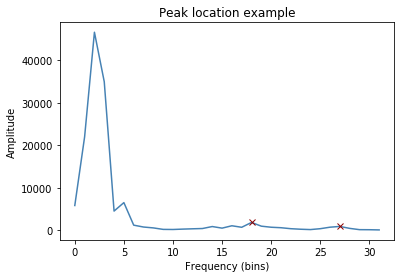

In [0]:
print('data dimensions', data.shape)
plot_data = np.abs(stft(data[20, :]))[50, :]
print(stft(data[20, :]).shape)
print("plot_data dimensions", plot_data.shape)
values, locs = peakfind(plot_data, n_peaks=2)
fp = locs[values > -1]
fv = values[values > -1]
plt.plot(plot_data, color='steelblue')
plt.plot(fp, fv, 'x', color='darkred')
plt.title('Peak location example')
plt.xlabel('Frequency (bins)')
plt.ylabel('Amplitude')

In [0]:
#This processing (top freq peaks) only works for single speaker case... need better features for multispeaker!
#MFCC (or deep NN/automatic feature extraction) could be interesting
all_obs = []
for i in range(data.shape[0]):
    d = np.abs(stft(data[i, :]))
    mfcc_feat = mfcc(sig,rate)
    print(mfcc_feat.shape)
    n_dim = 6
    obs = np.zeros((n_dim, d.shape[0]))
    for r in range(d.shape[0]):
#         print(d.shape[1])
        _, t = peakfind(d[r, :], n_peaks=n_dim)
        obs[:, r] = t.copy()
    if i % 10 == 0:
        print("Processed obs %s" % i)
#     print("dimension of obs", obs.shape)
#     print("OBS =", obs)
    all_obs.append(obs)
    
all_obs = np.atleast_3d(all_obs)
print(all_obs.shape)

(47, 13)
Processed obs 0
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
Processed obs 10
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
Processed obs 20
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
Processed obs 30
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
Processed obs 40
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
Processed obs 50
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
Processed obs 60
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
Processed obs 70
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
Processed obs 80
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
(47, 13)
Processed obs 90
(47, 13)
(47

In [0]:
import scipy.stats as st
import numpy as np

class gmmhmm:
    #This class converted with modifications from https://code.google.com/p/hmm-speech-recognition/source/browse/Word.m
    def __init__(self, n_states):
        self.n_states = n_states
        self.random_state = np.random.RandomState(0)
        
        #Normalize random initial state
        self.prior = self._normalize(self.random_state.rand(self.n_states, 1))
        self.A = self._stochasticize(self.random_state.rand(self.n_states, self.n_states))
        
        self.mu = None
        self.covs = None
        self.n_dims = None
           
    def _forward(self, B):
        log_likelihood = 0.
        T = B.shape[1]
        alpha = np.zeros(B.shape)
        for t in range(T):
            if t == 0:
                alpha[:, t] = B[:, t] * self.prior.ravel()
            else:
                alpha[:, t] = B[:, t] * np.dot(self.A.T, alpha[:, t - 1])
         
            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood = log_likelihood + np.log(alpha_sum)
        return log_likelihood, alpha
    
    def _backward(self, B):
        T = B.shape[1]
        beta = np.zeros(B.shape);
           
        beta[:, -1] = np.ones(B.shape[0])
            
        for t in range(T - 1)[::-1]:
            beta[:, t] = np.dot(self.A, (B[:, t + 1] * beta[:, t + 1]))
            beta[:, t] /= np.sum(beta[:, t])
        return beta
    
    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.n_states, obs.shape[1]))
        for s in range(self.n_states):
            #Needs scipy 0.14
            np.random.seed(self.random_state.randint(1))
            B[s, :] = st.multivariate_normal.pdf(
                obs.T, mean=self.mu[:, s].T, cov=self.covs[:, :, s].T)
            #This function can (and will!) return values >> 1
            #See the discussion here for the equivalent matlab function
            #https://groups.google.com/forum/#!topic/comp.soft-sys.matlab/YksWK0T74Ak
            #Key line: "Probabilities have to be less than 1,
            #Densities can be anything, even infinite (at individual points)."
            #This is evaluating the density at individual points...
        return B
    
    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)
    
    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)
    
    def _em_init(self, obs):
        #Using this _em_init function allows for less required constructor args
        if self.n_dims is None:
            self.n_dims = obs.shape[0]
        if self.mu is None:
            subset = self.random_state.choice(np.arange(self.n_dims), size=self.n_states, replace=False)
            self.mu = obs[:, subset]
        if self.covs is None:
            self.covs = np.zeros((self.n_dims, self.n_dims, self.n_states))
            self.covs += np.diag(np.diag(np.cov(obs)))[:, :, None]
        return self
    
    def _em_step(self, obs): 
        obs = np.atleast_2d(obs)
        B = self._state_likelihood(obs)
        T = obs.shape[1]
        
        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)
        
        xi_sum = np.zeros((self.n_states, self.n_states))
        gamma = np.zeros((self.n_states, T))
        
        for t in range(T - 1):
            partial_sum = self.A * np.dot(alpha[:, t], (beta[:, t] * B[:, t + 1]).T)
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:, t] * beta[:, t]
            gamma[:, t] = self._normalize(partial_g)
              
        partial_g = alpha[:, -1] * beta[:, -1]
        gamma[:, -1] = self._normalize(partial_g)
        
        expected_prior = gamma[:, 0]
        expected_A = self._stochasticize(xi_sum)
        
        expected_mu = np.zeros((self.n_dims, self.n_states))
        expected_covs = np.zeros((self.n_dims, self.n_dims, self.n_states))
        
        gamma_state_sum = np.sum(gamma, axis=1)
        #Set zeros to 1 before dividing
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)
        
        for s in range(self.n_states):
            gamma_obs = obs * gamma[s, :]
            expected_mu[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]
            partial_covs = np.dot(gamma_obs, obs.T) / gamma_state_sum[s] - np.dot(expected_mu[:, s], expected_mu[:, s].T)
            #Symmetrize
            partial_covs = np.triu(partial_covs) + np.triu(partial_covs).T - np.diag(partial_covs)
        
        #Ensure positive semidefinite by adding diagonal loading
        expected_covs += .01 * np.eye(self.n_dims)[:, :, None]
        
        self.prior = expected_prior
        self.mu = expected_mu
        self.covs = expected_covs
        self.A = expected_A
        return log_likelihood
    
    def fit(self, obs, n_iter=15):
        #Support for 2D and 3D arrays
        #2D should be n_features, n_dims
        #3D should be n_examples, n_features, n_dims
        #For example, with 6 features per speech segment, 105 different words
        #this array should be size
        #(105, 6, X) where X is the number of frames with features extracted
        #For a single example file, the array should be size (6, X)
        if len(obs.shape) == 2:
            for i in range(n_iter):
                self._em_init(obs)
                log_likelihood = self._em_step(obs)
        elif len(obs.shape) == 3:
            count = obs.shape[0]
            for n in range(count):
                for i in range(n_iter):
                    self._em_init(obs[n, :, :])
                    log_likelihood = self._em_step(obs[n, :, :])
        return self
    
    def transform(self, obs):
        #Support for 2D and 3D arrays
        #2D should be n_features, n_dims
        #3D should be n_examples, n_features, n_dims
        #For example, with 6 features per speech segment, 105 different words
        #this array should be size
        #(105, 6, X) where X is the number of frames with features extracted
        #For a single example file, the array should be size (6, X)
        if len(obs.shape) == 2:
            B = self._state_likelihood(obs)
            log_likelihood, _ = self._forward(B)
            return log_likelihood
        elif len(obs.shape) == 3:
            count = obs.shape[0]
            out = np.zeros((count,))
            for n in range(count):
                B = self._state_likelihood(obs[n, :, :])
                log_likelihood, _ = self._forward(B)
                out[n] = log_likelihood
            return out

if __name__ == "__main__":
    rstate = np.random.RandomState(0)
    t1 = np.ones((4, 40)) + .001 * rstate.rand(4, 40)
    t1 /= t1.sum(axis=0)
    t2 = rstate.rand(*t1.shape)
    t2 /= t2.sum(axis=0)
    
    m1 = gmmhmm(2)
    m1.fit(t1)
    m2 = gmmhmm(2)
    m2.fit(t2)
    
    m1t1 = m1.transform(t1)
    m2t1 = m2.transform(t1)
    print("Likelihoods for test set 1")
    print("M1:", m1t1)
    print("M2:", m2t1)
    print("Prediction for test set 1")
    print("Model", np.argmax([m1t1, m2t1]) + 1)
    print()
    
    m1t2 = m1.transform(t2)
    m2t2 = m2.transform(t2)
    print("Likelihoods for test set 2")
    print("M1:", m1t2)
    print("M2:", m2t2)
    print("Prediction for test set 2")
    print("Model", np.argmax([m1t2, m2t2]) + 1)

Likelihoods for test set 1
M1: 221.38828575112734
M2: 165.27280230776495
Prediction for test set 1
Model 1

Likelihoods for test set 2
M1: 33.19459421485196
M2: 59.15274753052998
Prediction for test set 2
Model 2


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
sss.get_n_splits(all_obs, all_labels)

for n,i in enumerate(all_obs):
    all_obs[n] /= all_obs[n].sum(axis=0)

for train_index, test_index in sss.split(all_obs, all_labels):
    X_train, X_test = all_obs[train_index, ...], all_obs[test_index, ...]
    y_train, y_test = all_labels[train_index], all_labels[test_index]
print('Size of training matrix:', X_train.shape)
print('Size of testing matrix:', X_test.shape)

Size of training matrix: (94, 6, 216)
Size of testing matrix: (11, 6, 216)


In [0]:
ys = set(all_labels)
ms = [gmmhmm(6) for y in ys]
_ = [m.fit(X_train[y_train == y, :, :]) for m, y in zip(ms, ys)]
ps = [m.transform(X_test) for m in ms]
print("ps is", ps)
res = np.vstack(ps)
print("res is", res)
predicted_labels = np.argmax(res, axis=0)
print("predicted labels is", predicted_labels)
missed = (predicted_labels != y_test)
print("missed is", missed)
print('Test accuracy: %.2f percent' % (100 * (1 - np.mean(missed))))

ps is [array([1305.69061289, 1239.21793619, 1485.67483275, 1372.82439678,
       1311.79523148, 1351.82521936, 1376.85877001, 1352.96220606,
       1309.71497396, 1275.84574947, 1430.43191908]), array([1268.83623794, 1071.01655565, 1588.76899475, 1234.60167682,
       1149.15957091, 1301.6497115 , 1436.91786077, 1350.46127676,
       1326.04669936, 1088.74392387, 1324.13252816]), array([1318.70833165, 1183.08436239, 1559.44546958, 1331.10219726,
       1261.69562351, 1353.99308884, 1429.52795373, 1378.94202239,
       1348.14797149, 1209.03572245, 1404.32712957]), array([1320.77859071, 1228.69327041, 1534.79072357, 1359.75959106,
       1296.70361919, 1362.59291758, 1429.77986002, 1378.92469398,
       1339.71827639, 1261.36189839, 1413.86876598]), array([1272.79805326, 1303.28420487, 1390.29832382, 1375.48131708,
       1338.36301919, 1318.00403444, 1350.48037951, 1304.67543004,
       1259.48463246, 1340.24493638, 1397.26614704]), array([1224.77352057, 1338.46147038, 1333.39823425, 1

Text(0.5, 0, 'Predicted label')

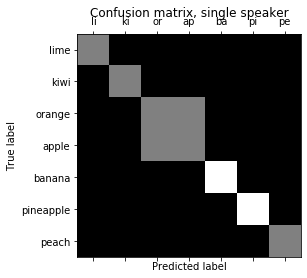

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.matshow(cm, cmap='gray')
ax = plt.gca()
_ = ax.set_xticklabels([" "] + [l[:2] for l in spoken])
_ = ax.set_yticklabels([" "] + spoken)
plt.title('Confusion matrix, single speaker')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [0]:
print('Size of training matrix:', X_train.shape)
print('Size of testing matrix:', X_test.shape)
print('Size of training matrix:', y_train.shape)
print('Size of testing matrix:', y_test.shape)

Size of training matrix: (94, 6, 216)
Size of testing matrix: (11, 6, 216)
Size of training matrix: (94,)
Size of testing matrix: (11,)


In [0]:
from tensorflow.keras.optimizers import SGD
np.random.seed(1337)
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding
# from keras.layers.recurrent import LSTM
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import CuDNNLSTM 

Using TensorFlow backend.


In [0]:
print('Size of training matrix:', X_train.shape)
print('Size of testing matrix:', X_test.shape)
print('Size of updated training matrix:', X_train[:, :, [i for i in range(99)]].shape)
print('Size of updated testing matrix:', X_test[:, :, [i for i in range(99)]].shape)
# m.fit(X_train[y_train == y, :, :].mean(axis=2))
# X_train_new = X_train[:, :, [i for i in range(20)]]
# X_test_new = X_test[:, :, [i for i in range(20)]]
# X_train_new = X_train.mean(axis=2)
# X_test_new = X_test.mean(axis=2)
# print('Size of training matrix:', X_train_new.shape)
# print('Size of testing matrix:', X_test_new.shape)
X_train_new = X_train.mean(axis=2)
X_test_new = X_test.mean(axis=2)

Size of training matrix: (94, 6, 216)
Size of testing matrix: (11, 6, 216)
Size of updated training matrix: (94, 6, 99)
Size of updated testing matrix: (11, 6, 99)


In [0]:
len(y_train)

94

In [0]:
# print(X_train[0, 0, 0])
# print(X_train[[3,4], [3,4], :])
# with open("train_sample.txt", "w") as fp:
#   fp.write(str(X_train[[3,4], :, :]))
# np.save("train_numpy", X_train[[3,4], :, :])
X_train[[5], :, :][0][0]
# print(y_train[3:6])

array([0.22368421, 0.17582418, 0.05376344, 0.20618557, 0.19791667,
       0.05063291, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.05063291, 0.06451613, 0.06451613, 0.05063291, 0.04761905,
       0.06451613, 0.06557377, 0.06666667, 0.05063291, 0.06896552,
       0.06451613, 0.06779661, 0.05952381, 0.06557377, 0.34177215,
       0.06557377, 0.06329114, 0.06896552, 0.0625    , 0.07142857,
       0.06097561, 0.06896552, 0.06329114, 0.06896552, 0.06097561,
       0.06896552, 0.06896552, 0.06896552, 0.06666667, 0.0617284 ,
       0.06349206, 0.06329114, 0.07142857, 0.0617284 , 0.06666667,
       0.07142857, 0.06666667, 0.06896552, 0.06896552, 0.06896552,
       0.06451613, 0.06557377, 0.06666667, 0.06557377, 0.05970149,
       0.06024096, 0.06779661, 0.06557377, 0.06779661, 0.07142857,
       0.14457831, 0.06666667, 0.1686747 , 0.06060606, 0.1547619 ,
       0.06451613, 0.06666667, 0.06097561, 0.17073171, 0.14457831,
       0.12941176, 0.06557377, 0.06557377, 0.05952381, 0.15476

In [0]:
def train_for_fruits(X_train_new, y_train, X_test_new, y_test):
  batch_size = 5
  hidden_units = 10
  # nb_classes = 7
  nb_classes = 1
  print('Loading data...')
  print(len(X_train_new), 'train sequences')
  print(len(X_test_new), 'test sequences')
  print('X_train shape:', X_train_new.shape)
  print('y_train shape:', y_train.shape)
  print('Build model...')

  # y_train = np_utils.to_categorical(y_train, nb_classes)
  # y_test = np_utils.to_categorical(y_test, nb_classes)

  print(y_train)
  print(y_test)
  model = Sequential()

  # model.add(Embedding(input_dim=(X_train.shape[1], X_train.shape[2]), output_dim=7, input_length=6))
  model.add(LSTM(units=hidden_units, input_shape=X_train.shape[1:], activation='tanh', recurrent_activation ='sigmoid', unit_forget_bias=True, kernel_initializer="uniform", recurrent_initializer="uniform"))
  # model.add(CuDNNLSTM(units=hidden_units, activation='tanh', recurrent_activation ='sigmoid'))

  model.add(Dense(nb_classes))
  model.add(Activation('softmax'))

  sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
  # model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])
  model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

  print("Train...")
  # with tf.device('/gpu:0'):
  model.fit(X_train_new, y_train, batch_size=batch_size, epochs=3, validation_data=(X_test_new, y_test))

  print('X_test shape:', X_test_new.shape)
  print('y_test shape:', y_test.shape)
  print("evaluation metrics\n", model.evaluate(X_test_new, y_test, batch_size=batch_size))
  score, acc = model.evaluate(X_test_new, y_test, batch_size=batch_size)
  print('Test score:', score)
  print('Test accuracy:', acc)
  # print("prediction for test set is", model.predict(X_test_new))
  return model

In [0]:
  def test_for_fruits(model, X_test_new, y_test):
    batch_size = 5
    print('X_test shape:', X_test_new.shape)
    print('y_test shape:', y_test.shape)
    print("evaluation metrics\n", model.evaluate(X_test_new, y_test, batch_size=batch_size))
    score, acc = model.evaluate(X_test_new, y_test, batch_size=batch_size)
    print('Test score:', score)
    print('Test accuracy:', acc)

In [0]:
import random
counter = 0
fruit_models = []
X_train_fruit = []
y_train_fruit = []

lime_indexes_train =  [ i for i in range(len(y_train)) if y_train[i] == 4 ]
lime_indexes_train_val = [lime_indexes_train[random.randrange(0, len(lime_indexes_train))] for i in range(int(0.2 * len(lime_indexes_train)))]
for index in lime_indexes_train:
  if index in lime_indexes_train_val:
    lime_indexes_train.remove(index)
lime_indexes_test =  [ i for i in range(len(y_test)) if y_test[i] == 4 ]

# print(lime_indexes_train)
# print(lime_indexes_train_val)
X_train_fruit = X_train[lime_indexes_train, :, :]
y_train_fruit = [0.99] * len(lime_indexes_train)
X_train_fruit = np.array(X_train_fruit)
y_train_fruit = np.array(y_train_fruit)

X_train_val_fruit = X_train[lime_indexes_train_val, :, :]
y_train_val_fruit = [0.99] * len(lime_indexes_train_val)
X_train_val_fruit = np.array(X_train_val_fruit)
y_train_val_fruit = np.array(y_train_val_fruit)

X_test_fruit = X_test[lime_indexes_test, :, :]
y_test_fruit = [0.99] * len(lime_indexes_test)
X_test_fruit = np.array(X_test_fruit)
y_test_fruit = np.array(y_test_fruit)
# print(X_test_fruit.shape)
# print(y_test_fruit.shape)
y_test_fruit = np.append(y_test_fruit, y_test[0])
y_test_fruit = np.append(y_test_fruit, y_test[1])
X_test_fruit = np.append(X_test_fruit, X_test[[0, 1], :, :], axis=0)

# print(X_test_fruit.shape)
# print(y_test_fruit.shape)
# print(train_for_fruits(X_train_fruit, y_train_fruit, X_train_val_fruit, y_train_val_fruit))
lime_model = train_for_fruits(X_train_fruit, y_train_fruit, X_train_val_fruit, y_train_val_fruit)
print(lime_model.predict(X_test_fruit))
print(y_test_fruit)


Loading data...
12 train sequences
2 test sequences
X_train shape: (12, 6, 216)
y_train shape: (12,)
Build model...
[0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99]
[0.99 0.99]
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train...
Train on 12 samples, validate on 2 samples
Epoch 1/3
12/12 [==============================] - 1s 55ms/sample - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/3
12/12 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/3
12/12 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
X_test shape: (2, 6, 216)
y_test shape: (2,)
2/2 [==============================] - 0s 1ms/sample - loss: 0.0000e+00 

In [0]:
def train_for_all_fruits(X_train_new, y_train, X_test_new, y_test):
  batch_size = 5
  hidden_units = 10
  nb_classes = 7
  # nb_classes = 1
  print('Loading data...')
  print(len(X_train_new), 'train sequences')
  print(len(X_test_new), 'test sequences')
  print('X_train shape:', X_train_new.shape)
  print('y_train shape:', y_train.shape)
  print('Build model...')

  print(y_train)
  print(y_test)
  y_train = np_utils.to_categorical(y_train, nb_classes)
  y_test = np_utils.to_categorical(y_test, nb_classes)

  print('y_train categorical is\n', y_train)
  print('y_test categorical is\n', y_test)
  model = Sequential()

  # model.add(Embedding(input_dim=(X_train.shape[1], X_train.shape[2]), output_dim=7, input_length=6))
  model.add(LSTM(units=hidden_units, input_shape=X_train.shape[1:], activation='tanh', recurrent_activation ='sigmoid', unit_forget_bias=True, kernel_initializer="uniform", recurrent_initializer="uniform"))
  # model.add(CuDNNLSTM(units=hidden_units, activation='tanh', recurrent_activation ='sigmoid'))

  model.add(Dense(nb_classes))
  model.add(Activation('softmax'))

  sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])
  # model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

  print("Train...")
  # with tf.device('/gpu:0'):
  model.fit(X_train_new, y_train, batch_size=batch_size, epochs=1000, validation_data=(X_test_new, y_test))

  print('X_test shape:', X_test_new.shape)
  print('y_test shape:', y_test.shape)
  print("evaluation metrics\n", model.evaluate(X_test_new, y_test, batch_size=batch_size))
  score, acc = model.evaluate(X_test_new, y_test, batch_size=batch_size)
  print('Test score:', score)
  print('Test accuracy:', acc)
  # print("prediction for test set is", model.predict(X_test_new))
  return model

In [0]:
import random
counter = 0
fruit_models = []
X_all_train_fruit = []
y_all_train_fruit = []

lime_indexes_train =  [ i for i in range(len(y_train)) ]
lime_indexes_train_val = [lime_indexes_train[random.randrange(0, len(lime_indexes_train))] for i in range(int(0.2 * len(lime_indexes_train)))]
temp_lime_indexes_train = []
for index in lime_indexes_train:
  if index in lime_indexes_train_val:
    continue
  else:
    temp_lime_indexes_train.append(index)
lime_indexes_train = temp_lime_indexes_train
lime_indexes_test =  [ i for i in range(len(y_test)) ]

# print(len(lime_indexes_train), lime_indexes_train)
# print(len(lime_indexes_train_val), lime_indexes_train_val)
# print(len(y_train))
X_all_train_fruit = X_train[lime_indexes_train, :, :]
y_all_train_fruit = [y_train[index]  for index in lime_indexes_train]
X_all_train_fruit = np.array(X_all_train_fruit)
y_all_train_fruit = np.array(y_all_train_fruit)

X_all_train_val_fruit = X_train[lime_indexes_train_val, :, :]
y_all_train_val_fruit = [y_train[index]  for index in lime_indexes_train_val]
X_all_train_val_fruit = np.array(X_all_train_val_fruit)
y_all_train_val_fruit = np.array(y_all_train_val_fruit)

X_test_fruit = X_test
y_test_fruit = y_test
X_test_fruit = np.array(X_test_fruit)
y_test_fruit = np.array(y_test_fruit)
# print(y_all_train_fruit)
# print(y_all_train_val_fruit)
# print(X_all_train_fruit.shape)
# print(y_all_train_fruit.shape)
# print(X_all_train_val_fruit.shape)
# print(y_all_train_val_fruit.shape)
# print(X_test_fruit.shape)
# print(y_test_fruit.shape)
print(train_for_fruits(X_train_fruit, y_train_fruit, X_train_val_fruit, y_train_val_fruit))
fruit_model = train_for_all_fruits(X_all_train_fruit, y_all_train_fruit, X_all_train_val_fruit, y_all_train_val_fruit)
test_fruit_predictions = fruit_model.predict(X_test_fruit)
print(test_fruit_predictions)
rnn_predictions = [list(np.where(predictions == max(predictions))[0])[0] for predictions in test_fruit_predictions]
print(rnn_predictions)
print(y_test_fruit)

Loading data...
12 train sequences
2 test sequences
X_train shape: (12, 6, 216)
y_train shape: (12,)
Build model...
[0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99]
[0.99 0.99]
Train...
Train on 12 samples, validate on 2 samples
Epoch 1/3
12/12 [==============================] - 0s 28ms/sample - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/3
12/12 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/3
12/12 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
X_test shape: (2, 6, 216)
y_test shape: (2,)
2/2 [==============================] - 0s 760us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
evaluation metrics
 [0.0, 0.0]
2/2 [==============================] - 0s 806us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Test score: 0.0
Test accuracy: 0.0
Loading data...
79 tr

In [0]:
rnn_predictions = [list(np.where(predictions == max(predictions))[0])[0] for predictions in test_fruit_predictions]
rnn_predictions = np.array(rnn_predictions)
print(rnn_predictions)
print(y_test_fruit)
missed = (rnn_predictions != y_test_fruit)
print(np.mean(np.array(missed)))
print('Test accuracy: %.2f percent' % (100 * (1 - np.mean(missed))))

[2 5 1 4 4 3 6 3 3 5 0]
[2. 5. 1. 4. 4. 3. 6. 3. 2. 5. 0.]
0.09090909090909091
Test accuracy: 90.91 percent


In [0]:
!pip install hmmlearn

     |████████████████████████████████| 153kB 2.9MB/s 
  Created wheel for hmmlearn: filename=hmmlearn-0.2.2-cp36-cp36m-linux_x86_64.whl size=325111 sha256=6ce2c643ef906f5ff38d1bdb0d0c46b7cf68d5e3ec22654dbb993b20df4fdd3b
  Stored in directory: /root/.cache/pip/wheels/2c/b6/0e/63a865a30e21e01d04f417d8995fbfb793d6bd464707efc546
Successfully built hmmlearn


In [0]:
# print(set(y_train))
from hmmlearn import hmm
models = [hmm.GaussianHMM(n_components=6) for y in set(y_train)]
for current_fruit in set(y_train):
  for i in range(len(y_train)):
    if y_train[i] == current_fruit:
      models[int(current_fruit)].fit(X_train[i, :, :])

# logprob = np.array([[models.score(i) for i in X_test.mean(axis=2)] for m in models])
logprob = []
for m in models:
  new_scores = []
  for i in range(len(y_test)):
    new_scores.append(m.score(X_test[i, :, :]))
  logprob.append(new_scores)

logprob = np.array(logprob)

y_predicted = np.argmax(logprob, axis=0)
print(y_predicted)
missed = (y_predicted != y_test)
print(y_test)
print(missed)
print(np.mean(missed))
print('Test accuracy: %.2f percent' % (100 * (1 - np.mean(missed))))

[2 0 1 0 0 3 6 3 2 0 0]
[2. 5. 1. 4. 4. 3. 6. 3. 2. 5. 0.]
[False  True False  True  True False False False False  True False]
0.36363636363636365
Test accuracy: 63.64 percent


In [0]:
for m in models:
  print(m.decode)
  break